In [60]:

import pandas as pd
data=pd.read_csv("CO2 emissions world data.csv")
data.head()

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654034,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250


In [61]:
columns_to_drop = ['Substance', 'EDGAR Country Code'] + [str(year) for year in range(1970, 1990)]
data = data.drop(columns=columns_to_drop, errors='ignore')


In [62]:
data.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,0.524847,0.620443,0.720163,0.691391,0.757696,0.814652,0.544440,0.831664,0.832856,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,Afghanistan,2.910442,2.778890,1.696297,1.626566,1.555483,1.380338,1.353128,1.337146,1.347632,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,Angola,11.298197,11.851036,12.196366,12.213651,11.568319,13.039689,15.773126,16.500580,17.138055,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,Anguilla,0.006114,0.007579,0.007903,0.009952,0.013131,0.016396,0.016213,0.013564,0.012449,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,International Aviation,258.993781,251.900903,260.067858,265.022085,278.583570,289.103425,300.847663,315.607704,326.243076,...,472.721119,480.909126,496.627697,524.654034,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250


In [63]:
data = data.set_index('Country')

In [64]:
data.head()
data = data.drop("GLOBAL TOTAL", axis=0)
data = data.drop("International Aviation", axis=0)
data = data.drop("Faroes", axis=0)

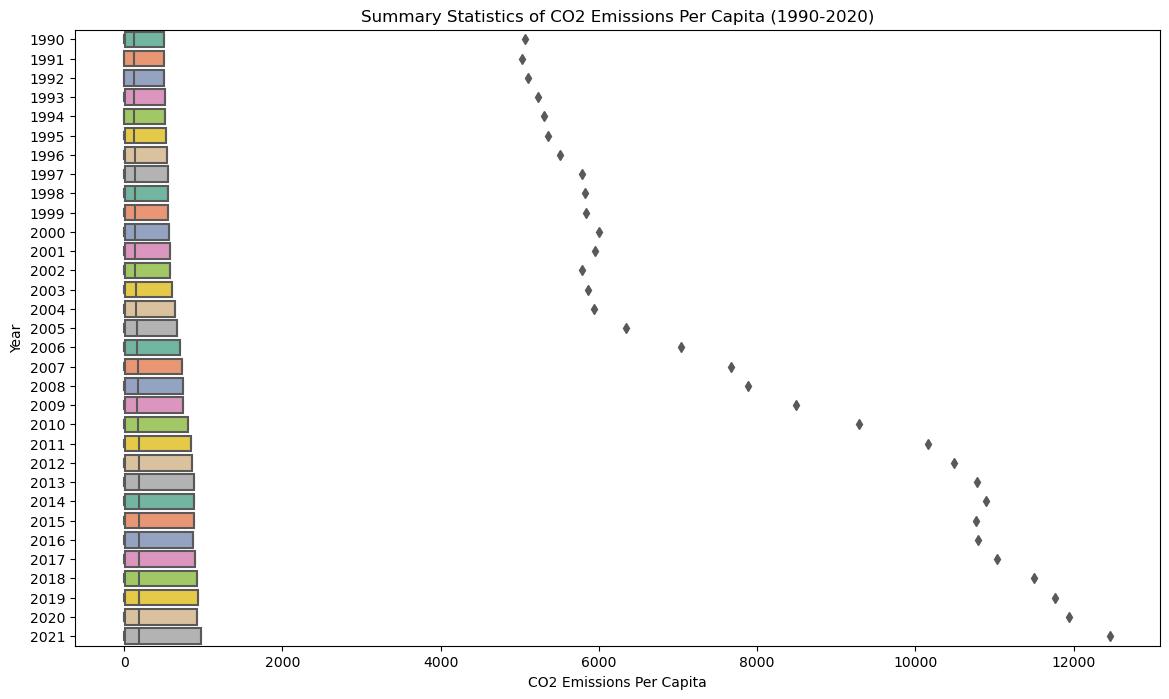

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = data.drop("GLOBAL TOTAL", axis=0, errors='ignore')

summary_stats = data.agg(['mean', 'median', 'std', 'min', 'max'], axis=0)

plt.figure(figsize=(14, 8))  
ax = sns.boxplot(data=summary_stats, palette='Set2', orient='h')



plt.title('Summary Statistics of CO2 Emissions Per Capita (1990-2020)')
plt.xlabel('CO2 Emissions Per Capita')
plt.ylabel('Year')
plt.show()


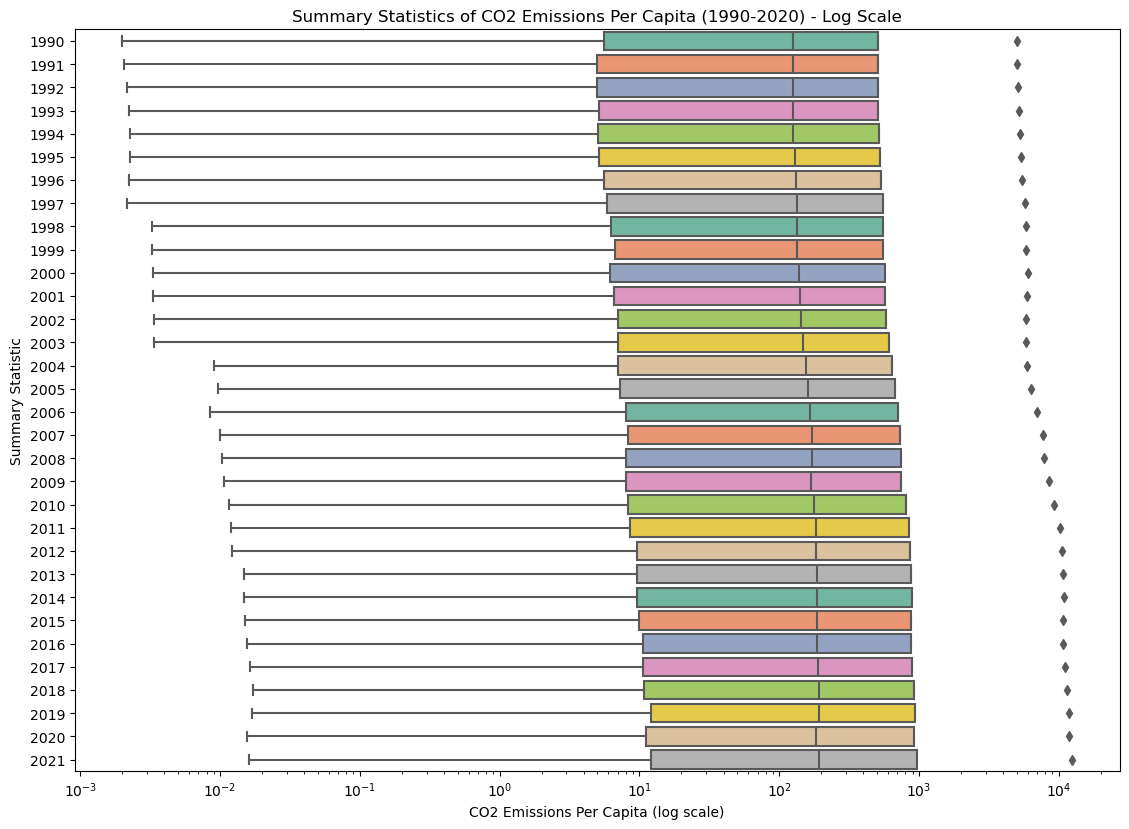

In [67]:
import pandas as pd

data = data.drop("GLOBAL TOTAL", axis=0, errors='ignore')

summary_table = pd.DataFrame(index=data.columns)

summary_table['Count'] = data.count()
summary_table['Mean'] = data.mean()
summary_table['Std Dev'] = data.std()
summary_table['Min'] = data.min()
summary_table['Min Country'] = data.idxmin()
summary_table['Max'] = data.max()
summary_table['Max Country'] = data.idxmax()

print(summary_table)


      Count        Mean     Std Dev       Min  \
1990    209  125.731924  509.756061  0.001986   
1991    209  126.135183  508.303822  0.002055   
1992    209  125.100487  506.203197  0.002137   
1993    209  125.230926  511.273396  0.002214   
1994    209  126.223876  516.987929  0.002263   
1995    209  129.593510  530.300897  0.002269   
1996    209  132.134264  539.614124  0.002224   
1997    209  133.912133  551.746870  0.002139   
1998    209  134.495706  555.804340  0.003230   
1999    209  134.984412  553.856729  0.003257   
2000    209  139.040929  570.560384  0.003290   
2001    209  140.868217  575.385351  0.003318   
2002    209  142.538508  577.569636  0.003348   
2003    209  149.023840  608.715036  0.003381   
2004    209  155.099666  642.499891  0.009091   
2005    209  160.008018  674.235154  0.009704   
2006    209  164.982993  703.577402  0.008524   
2007    209  170.486656  737.958980  0.009916   
2008    209  170.937705  739.852149  0.010374   
2009    209  167.822

In [68]:
summary_table.head()

,Count,Mean,Std Dev,Min,Min Country,Max,Max Country
1990,209,125.731924,509.756061,0.001986,Timor-Leste,5067.479546,United States
1991,209,126.135183,508.303822,0.002055,Timor-Leste,5025.951278,United States
1992,209,125.100487,506.203197,0.002137,Timor-Leste,5106.826241,United States
1993,209,125.230926,511.273396,0.002214,Timor-Leste,5225.130773,United States
1994,209,126.223876,516.987929,0.002263,Timor-Leste,5308.827872,United States


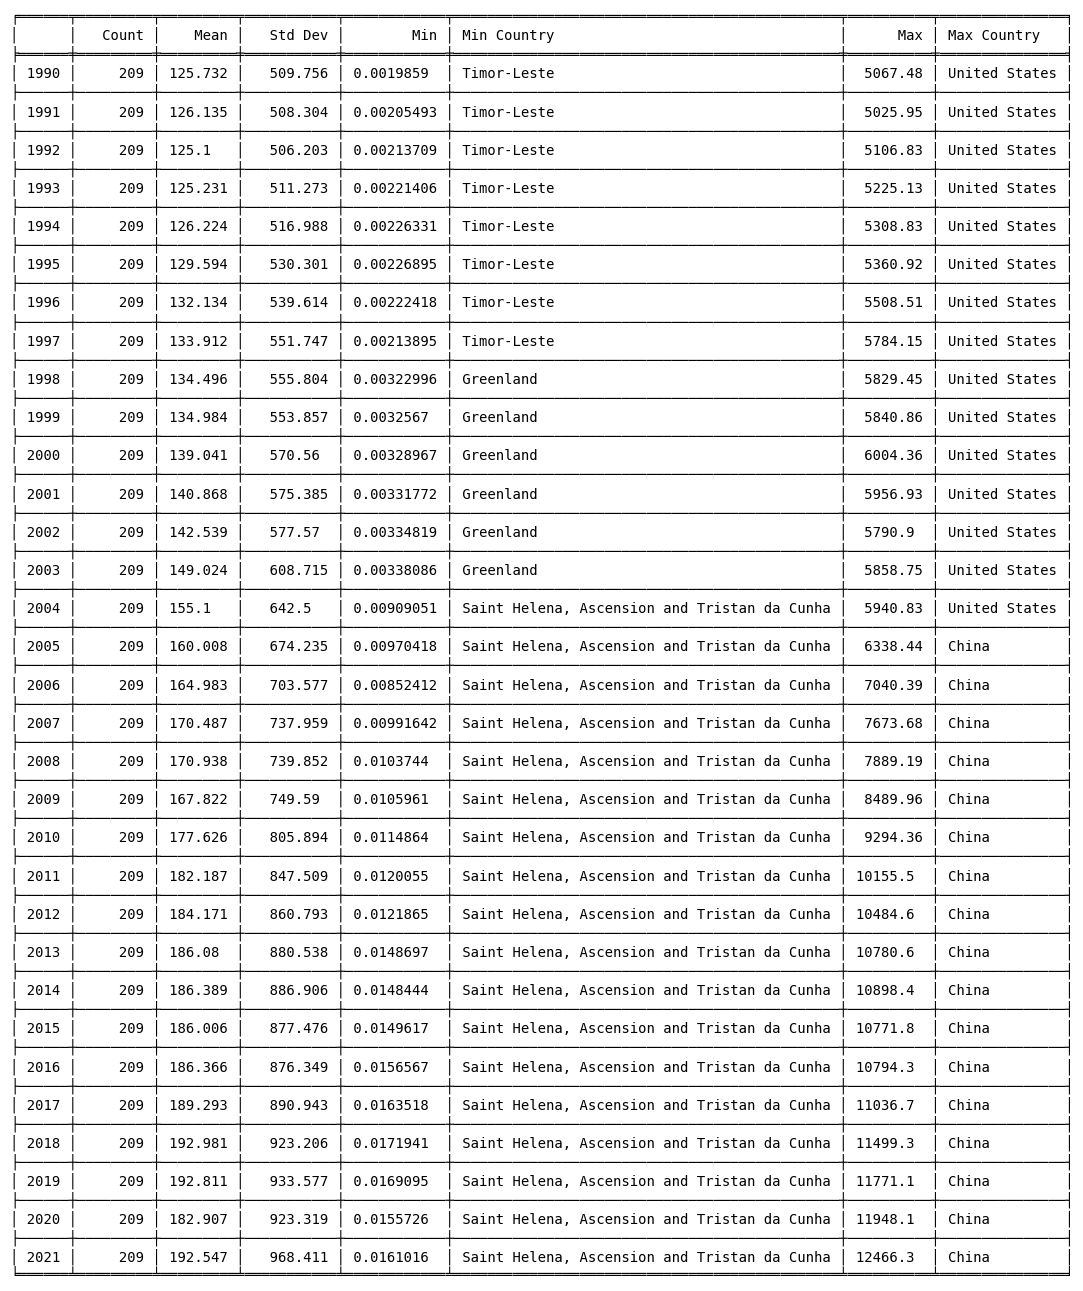

In [69]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

data = data.drop("GLOBAL TOTAL", axis=0, errors='ignore')


summary_table = pd.DataFrame(index=data.columns)

summary_table['Count'] = data.count()
summary_table['Mean'] = data.mean()
summary_table['Std Dev'] = data.std()
summary_table['Min'] = data.min()
summary_table['Min Country'] = data.idxmin()
summary_table['Max'] = data.max()
summary_table['Max Country'] = data.idxmax()


table_str = tabulate(summary_table, headers='keys', tablefmt='fancy_grid', showindex=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.text(0, 1, table_str, va='top', fontfamily='monospace', fontsize=10)  # Display the table as text

# Save the figure as an image
plt.savefig('summary_table.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()


In [70]:
import pandas as pd
UN=pd.read_csv("Undata.csv")
UN.head()


,Country or Area,Year,Value,Value Footnotes
0,Albania,2020,29.4,1
1,Albania,2019,30.1,1
2,Albania,2018,30.1,1
3,Albania,2017,33.1,1
4,Albania,2016,33.7,1


In [71]:

UN = UN.pivot(index='Country or Area', columns='Year', values='Value')
UN = UN.rename_axis(index='Country')
print(UN)


Year                1963  1964  1965  1966  1967  1968  1969  1970  1971  \
Country                                                                    
Albania              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Algeria              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Angola               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Argentina            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Armenia              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...   
Viet Nam             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
West Bank and Gaza   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Yemen                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zambia               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Zimbabwe             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Year       

In [72]:
UN.head()

Year,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,34.6,32.8,33.7,33.1,30.1,30.1,29.4,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN,NaN
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.9,41.6,NaN,42.0,41.1,41.3,42.9,42.3,42.0,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.6,31.5,32.4,32.5,33.6,34.4,30.0,25.1,27.9,NaN


In [73]:
columns_to_drop = list(range(1963, 1990))
UN = UN.drop(columns=columns_to_drop, errors='ignore')

In [74]:
UN.head()

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,...,NaN,34.6,32.8,33.7,33.1,30.1,30.1,29.4,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,35.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN,NaN
Argentina,NaN,46.8,45.5,44.9,45.9,48.9,49.5,49.1,50.7,49.8,...,40.9,41.6,NaN,42.0,41.1,41.3,42.9,42.3,42.0,NaN
Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.2,...,30.6,31.5,32.4,32.5,33.6,34.4,30.0,25.1,27.9,NaN


In [75]:
non_nan_counts_per_column = UN.count(axis=0)
print(non_nan_counts_per_column)

Year
1990    22
1991    19
1992    34
1993    26
1994    26
1995    38
1996    36
1997    30
1998    41
1999    37
2000    49
2001    38
2002    57
2003    60
2004    70
2005    76
2006    77
2007    70
2008    75
2009    79
2010    84
2011    79
2012    85
2013    77
2014    83
2015    85
2016    83
2017    76
2018    88
2019    71
2020    53
2021    22
2022     7
dtype: int64


In [76]:
Gini=pd.read_csv("swiid.csv")

In [77]:
Gini.head()

,country,year,gini_disp,gini_disp_se,gini_mkt,gini_mkt_se,abs_red,abs_red_se,rel_red,rel_red_se
0,Afghanistan,2007,31.3,2.61,32.9,2.92,NaN,NaN,NaN,NaN
1,Afghanistan,2008,31.4,2.53,32.9,2.87,NaN,NaN,NaN,NaN
2,Afghanistan,2009,31.4,2.57,33.0,2.92,NaN,NaN,NaN,NaN
3,Afghanistan,2010,31.5,2.59,33.1,2.95,NaN,NaN,NaN,NaN
4,Afghanistan,2011,31.6,2.60,33.1,2.97,NaN,NaN,NaN,NaN


In [78]:
Gini = Gini[['country','year', 'gini_disp']]

In [79]:
Gini.head(20)

,country,year,gini_disp
0,Afghanistan,2007,31.3
1,Afghanistan,2008,31.4
2,Afghanistan,2009,31.4
3,Afghanistan,2010,31.5
4,Afghanistan,2011,31.6
5,Afghanistan,2012,31.7
6,Afghanistan,2013,31.7
7,Afghanistan,2014,31.7
8,Afghanistan,2015,31.7
9,Afghanistan,2016,31.7


In [80]:
Gini = Gini.pivot(index='country', columns='year', values='gini_disp')


In [81]:
Gini.head()

year,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.7,31.7,31.7,31.7,31.7,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,37.7,37.7,37.7,37.5,37.3,37.0,36.9,36.9,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,31.0,31.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.3,49.4,49.4,49.5,49.6,49.6,NaN,NaN,NaN,NaN


In [82]:
Gini = Gini.astype(int, errors='ignore')
data = data.astype(int, errors='ignore')

In [83]:
columns_to_drop = list(range(1960, 1990))
Gini = Gini.drop(columns=columns_to_drop, errors='ignore')
columns_to_drop2 = list(range(2020, 2023))
Gini = Gini.drop(columns=columns_to_drop2, errors='ignore')

In [84]:
Gini.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.5,31.6,31.7,31.7,31.7,31.7,31.7,31.7,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.4,36.5,36.6,36.8,...,37.6,37.6,37.6,37.7,37.7,37.7,37.5,37.3,37.0,36.9
Algeria,37.2,37.1,37.0,36.8,36.7,36.6,36.4,36.3,36.2,36.0,...,34.5,34.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.1,49.2,49.2,49.3,49.4,49.4,49.5,49.6,49.6,NaN


In [85]:
non_nan_counts_per_column = Gini.count(axis=0)
print(non_nan_counts_per_column)

year
1990    110
1991    111
1992    119
1993    125
1994    130
1995    136
1996    142
1997    145
1998    147
1999    150
2000    153
2001    158
2002    165
2003    168
2004    169
2005    175
2006    180
2007    183
2008    181
2009    177
2010    175
2011    170
2012    169
2013    164
2014    158
2015    145
2016    138
2017    127
2018    110
2019     91
dtype: int64


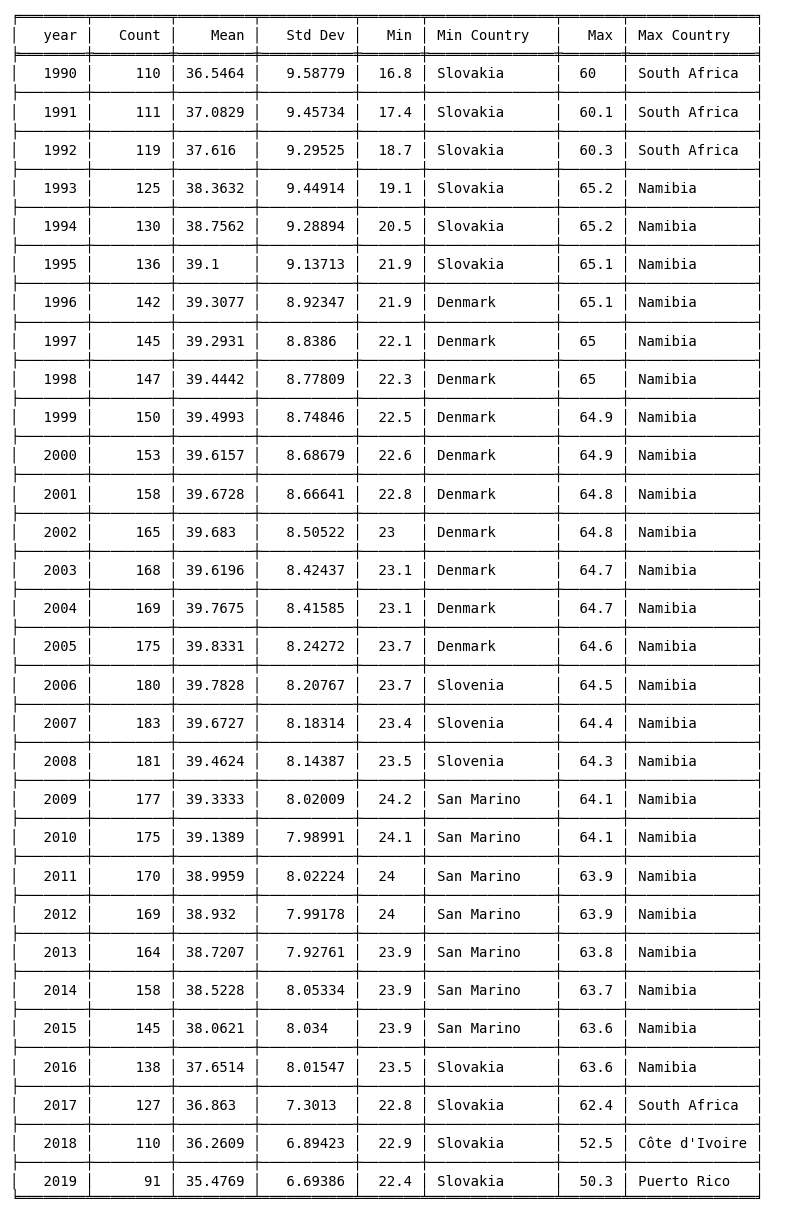

In [86]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

summary_table_gini = pd.DataFrame(index=Gini.columns)

summary_table_gini['Count'] = Gini.count()
summary_table_gini['Mean'] = Gini.mean()
summary_table_gini['Std Dev'] = Gini.std()
summary_table_gini['Min'] = Gini.min()
summary_table_gini['Min Country'] = Gini.idxmin()
summary_table_gini['Max'] = Gini.max()
summary_table_gini['Max Country'] = Gini.idxmax()

table_str_gini = tabulate(summary_table_gini, headers='keys', tablefmt='fancy_grid', showindex=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.text(0, 1, table_str_gini, va='top', fontfamily='monospace', fontsize=10)  # Display the table as text

# Save the figure as an image
plt.savefig('summary_table_gini.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()


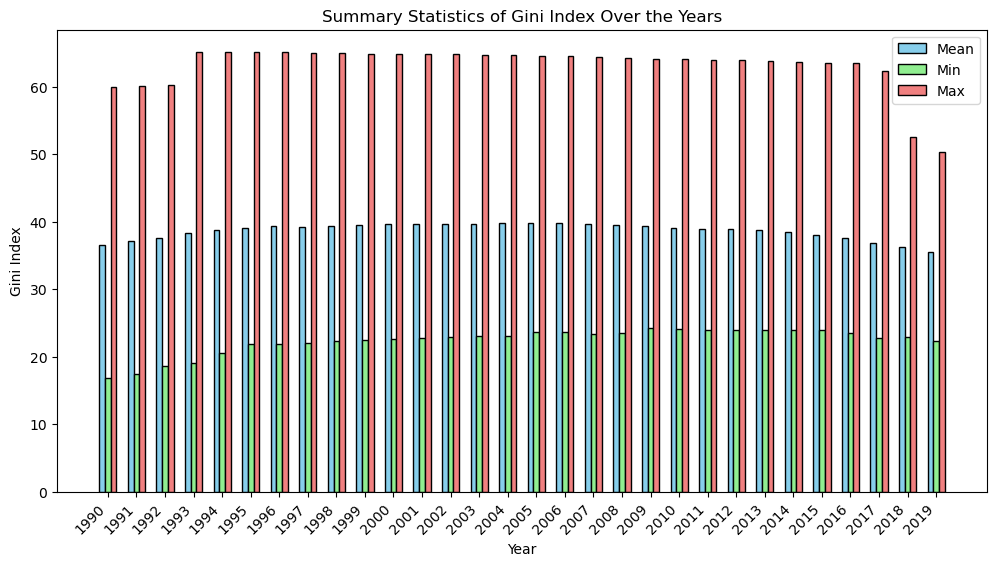

In [87]:
import matplotlib.pyplot as plt

summary_stats = Gini.describe().transpose()

mean_color = 'skyblue'
min_color = 'lightgreen'
max_color = 'lightcoral'

plt.figure(figsize=(12, 6))


for i, (index, row) in enumerate(summary_stats.iterrows()):
    plt.bar(index - 0.2, row['mean'], color=mean_color, width=0.2, label='Mean' if i == 0 else "", edgecolor='black')


for i, (index, row) in enumerate(summary_stats.iterrows()):
    plt.bar(index, row['min'], color=min_color, width=0.2, label='Min' if i == 0 else "", edgecolor='black')


for i, (index, row) in enumerate(summary_stats.iterrows()):
    plt.bar(index + 0.2, row['max'], color=max_color, width=0.2, label='Max' if i == 0 else "", edgecolor='black')

plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.title('Summary Statistics of Gini Index Over the Years')
plt.legend()

plt.xticks(summary_stats.index, rotation=45, ha='right')

plt.show()


In [88]:
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0.524847,0.620443,0.720163,0.691391,0.757696,0.814652,0.544440,0.831664,0.832856,0.879121,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
Afghanistan,2.910442,2.778890,1.696297,1.626566,1.555483,1.380338,1.353128,1.337146,1.347632,1.305541,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
Angola,11.298197,11.851036,12.196366,12.213651,11.568319,13.039689,15.773126,16.500580,17.138055,18.134385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
Anguilla,0.006114,0.007579,0.007903,0.009952,0.013131,0.016396,0.016213,0.013564,0.012449,0.011751,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
Albania,6.653018,4.437322,2.419830,2.274801,2.387156,2.111884,2.101389,1.628675,1.955473,3.129668,...,4.574328,4.811345,5.134697,4.916119,4.619508,5.346925,5.314989,5.038618,4.706920,4.591114


In [89]:
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0.524847,0.620443,0.720163,0.691391,0.757696,0.814652,0.544440,0.831664,0.832856,0.879121,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
Afghanistan,2.910442,2.778890,1.696297,1.626566,1.555483,1.380338,1.353128,1.337146,1.347632,1.305541,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
Angola,11.298197,11.851036,12.196366,12.213651,11.568319,13.039689,15.773126,16.500580,17.138055,18.134385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
Anguilla,0.006114,0.007579,0.007903,0.009952,0.013131,0.016396,0.016213,0.013564,0.012449,0.011751,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
Albania,6.653018,4.437322,2.419830,2.274801,2.387156,2.111884,2.101389,1.628675,1.955473,3.129668,...,4.574328,4.811345,5.134697,4.916119,4.619508,5.346925,5.314989,5.038618,4.706920,4.591114


In [90]:

data = data.loc[:, '1990':'2019']
data.head()



,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,0.524847,0.620443,0.720163,0.691391,0.757696,0.814652,0.544440,0.831664,0.832856,0.879121,...,1.332395,1.266665,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156
Afghanistan,2.910442,2.778890,1.696297,1.626566,1.555483,1.380338,1.353128,1.337146,1.347632,1.305541,...,8.086217,11.918898,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724
Angola,11.298197,11.851036,12.196366,12.213651,11.568319,13.039689,15.773126,16.500580,17.138055,18.134385,...,22.973758,23.864636,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994
Anguilla,0.006114,0.007579,0.007903,0.009952,0.013131,0.016396,0.016213,0.013564,0.012449,0.011751,...,0.024004,0.026008,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580
Albania,6.653018,4.437322,2.419830,2.274801,2.387156,2.111884,2.101389,1.628675,1.955473,3.129668,...,4.616941,5.014836,4.574328,4.811345,5.134697,4.916119,4.619508,5.346925,5.314989,5.038618


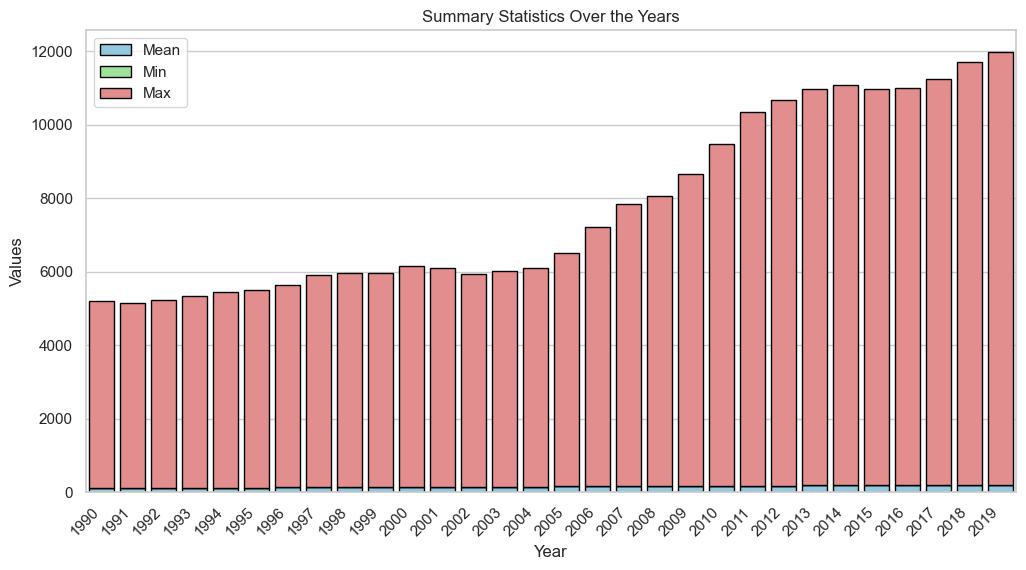

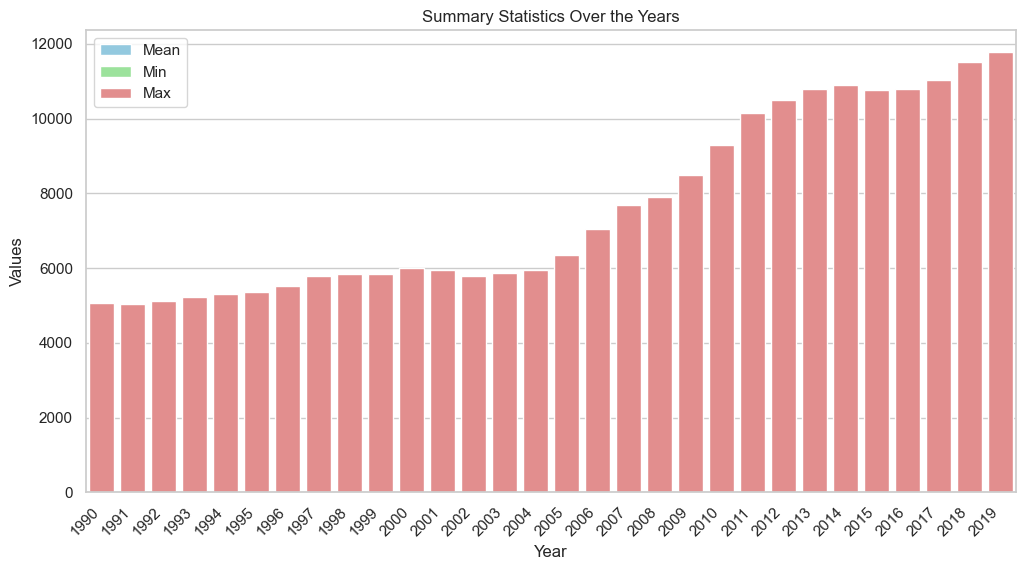

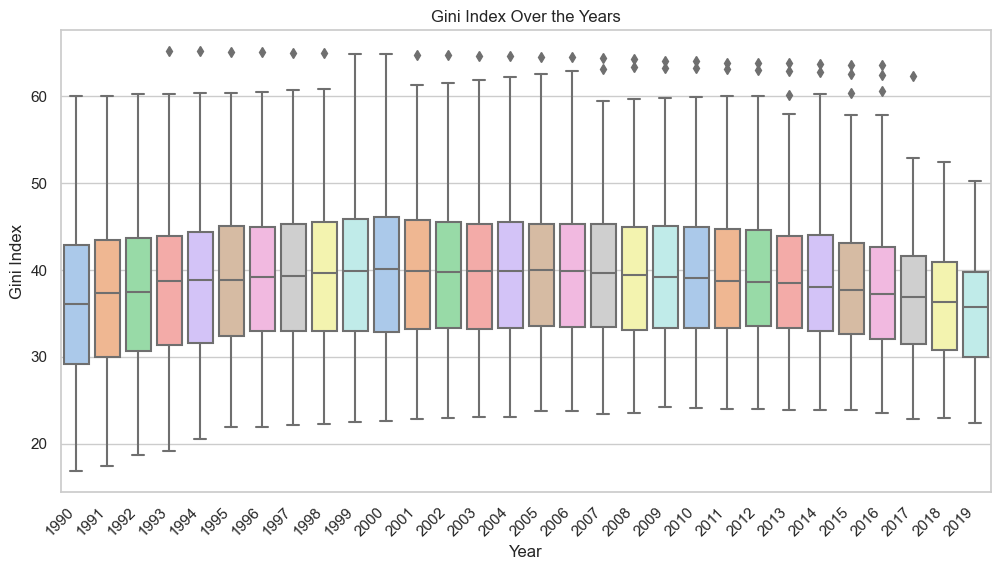

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))

sns.boxplot(data=Gini, palette='pastel')

plt.xlabel('Year')
plt.ylabel('Gini Index')

plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.title('Gini Index Over the Years')


plt.xticks(rotation=45, ha='right')

plt.show()


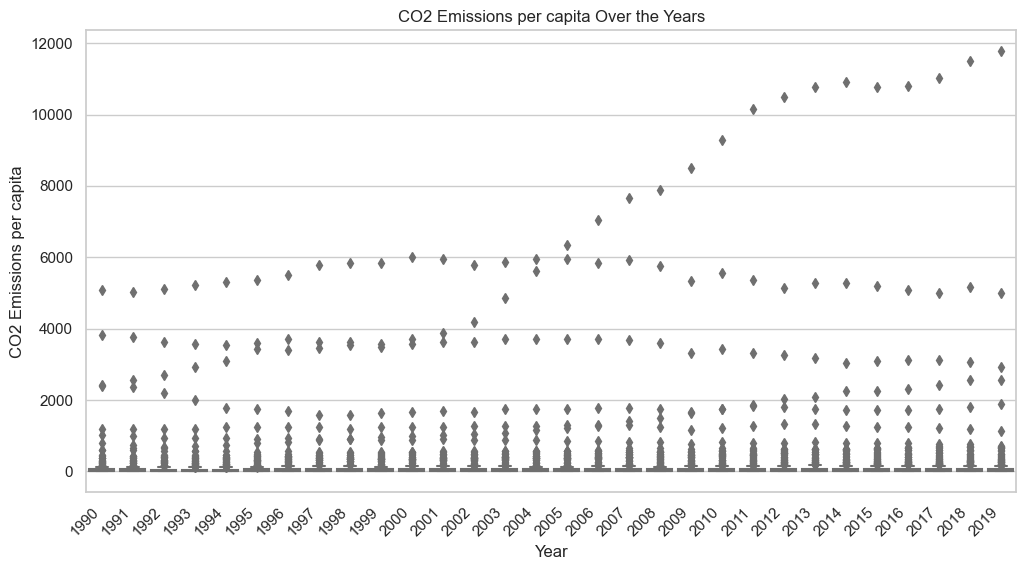

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))

sns.boxplot(data=data, palette='pastel')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions per capita')
plt.title('CO2 Emissions per capita Over the Years')

plt.xticks(rotation=45, ha='right')

plt.show()


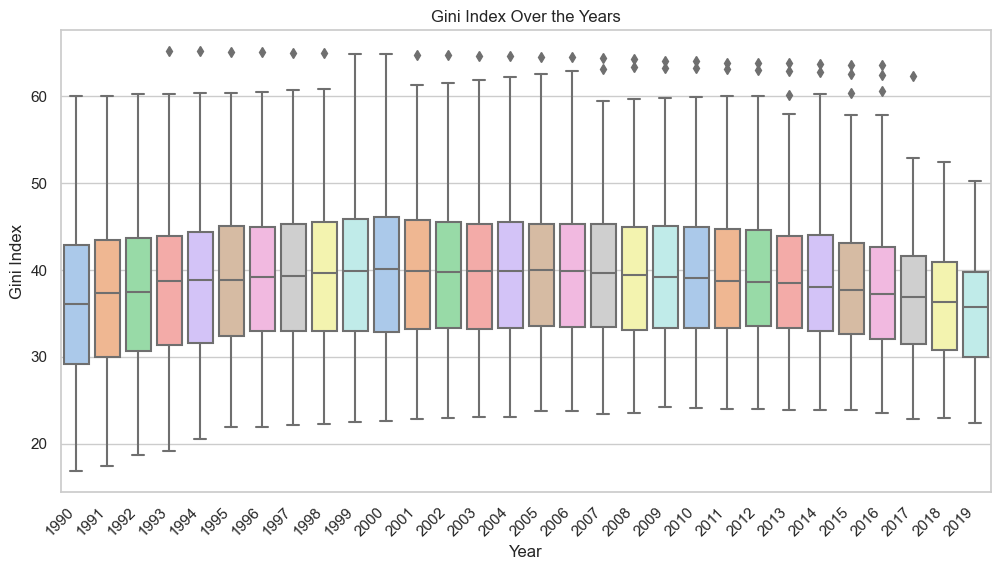

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(data=Gini, palette='pastel')

plt.xlabel('Year')
plt.ylabel('Gini Index')
plt.title('Gini Index Over the Years')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


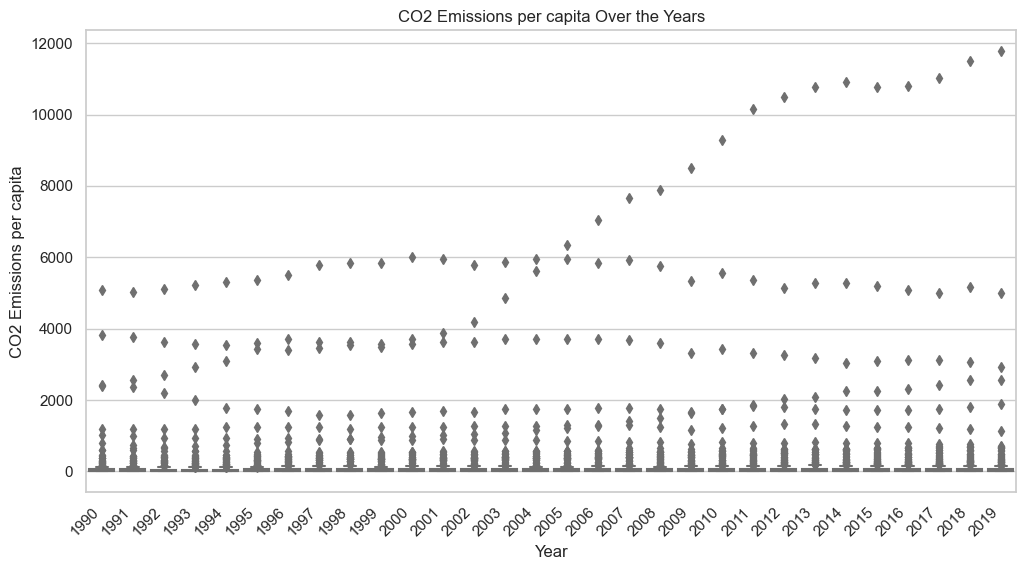

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))


sns.boxplot(data=data, palette='pastel')

plt.xlabel('Year')
plt.ylabel('CO2 Emissions per capita')
plt.title('CO2 Emissions per capita Over the Years')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


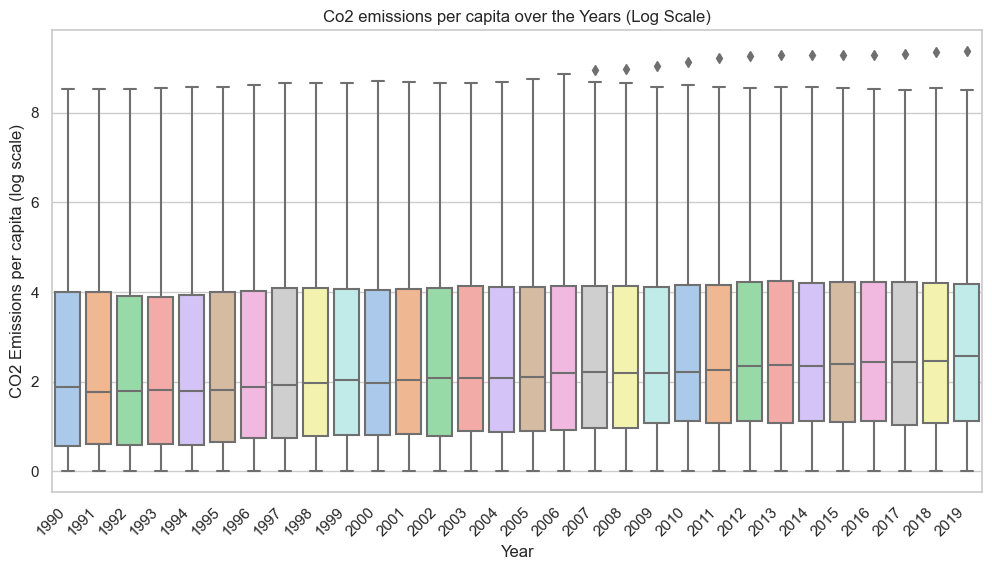

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

sns.boxplot(data=np.log1p(data), palette='pastel')
plt.ylabel('log(CO2 Emissions per Capita)')



plt.xlabel('Year')
plt.ylabel('CO2 Emissions per capita (log scale)')
plt.title('Co2 emissions per capita over the Years (Log Scale)')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


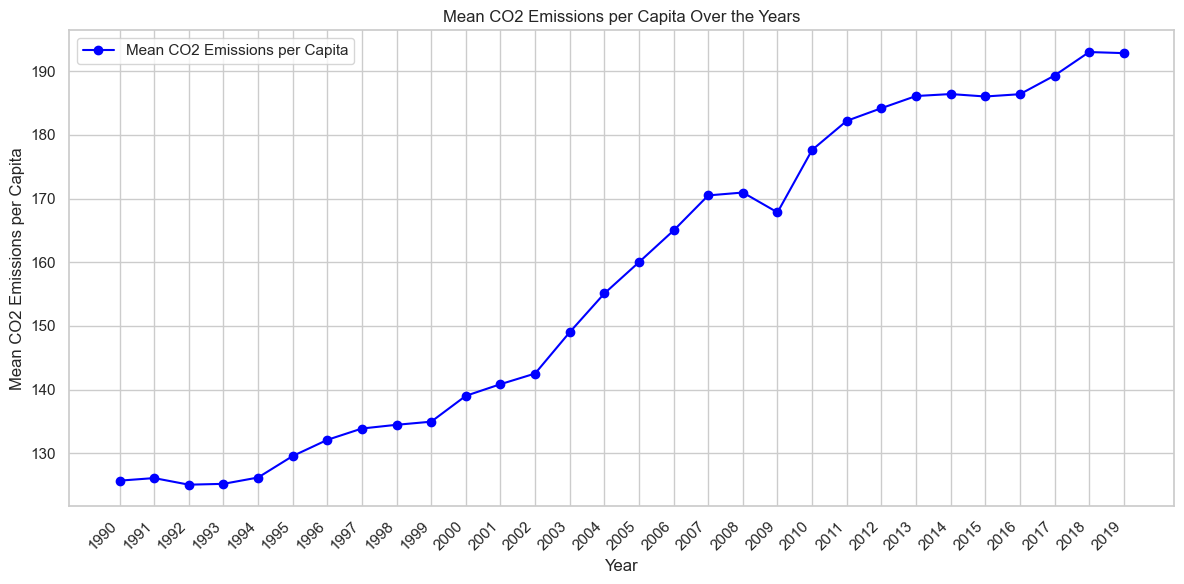

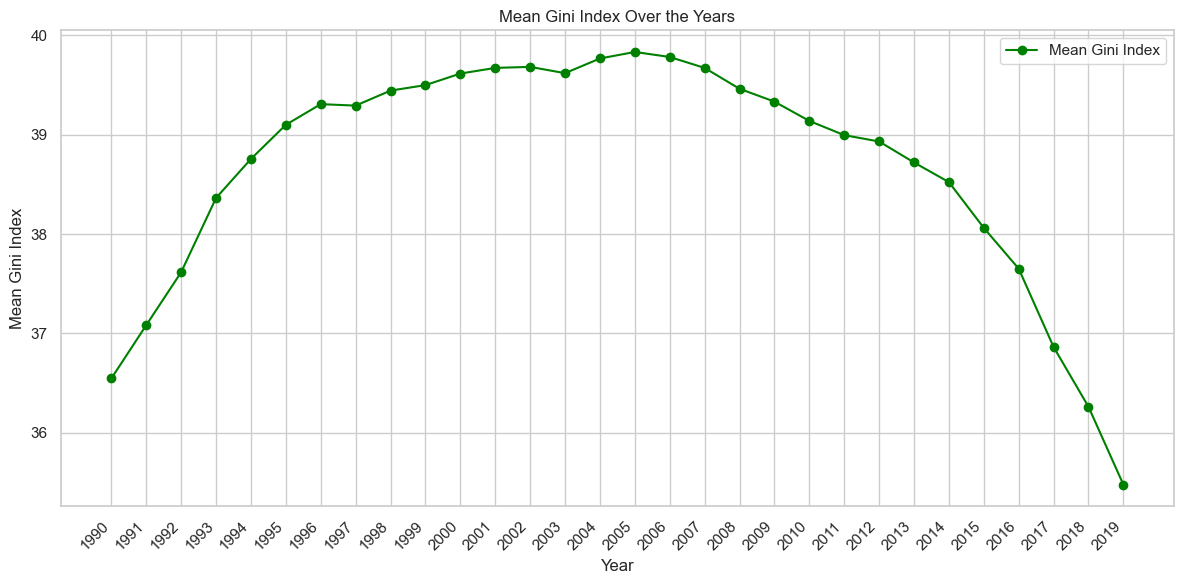

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


mean_co2 = data.mean()
mean_gini = Gini.mean()  
plt.figure(figsize=(12, 6))
plt.plot(mean_co2.index, mean_co2.values, marker='o', color='blue', label='Mean CO2 Emissions per Capita', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Emissions per Capita')
plt.title('Mean CO2 Emissions per Capita Over the Years')
plt.legend()
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(mean_gini.index, mean_gini.values, marker='o', color='green', label='Mean Gini Index', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Gini Index')
plt.title('Mean Gini Index Over the Years')
plt.legend()
plt.xticks(rotation=45, ha='right')  
plt.xticks(range(mean_gini.index.min(), mean_gini.index.max()+1))  
plt.tight_layout()
plt.show()


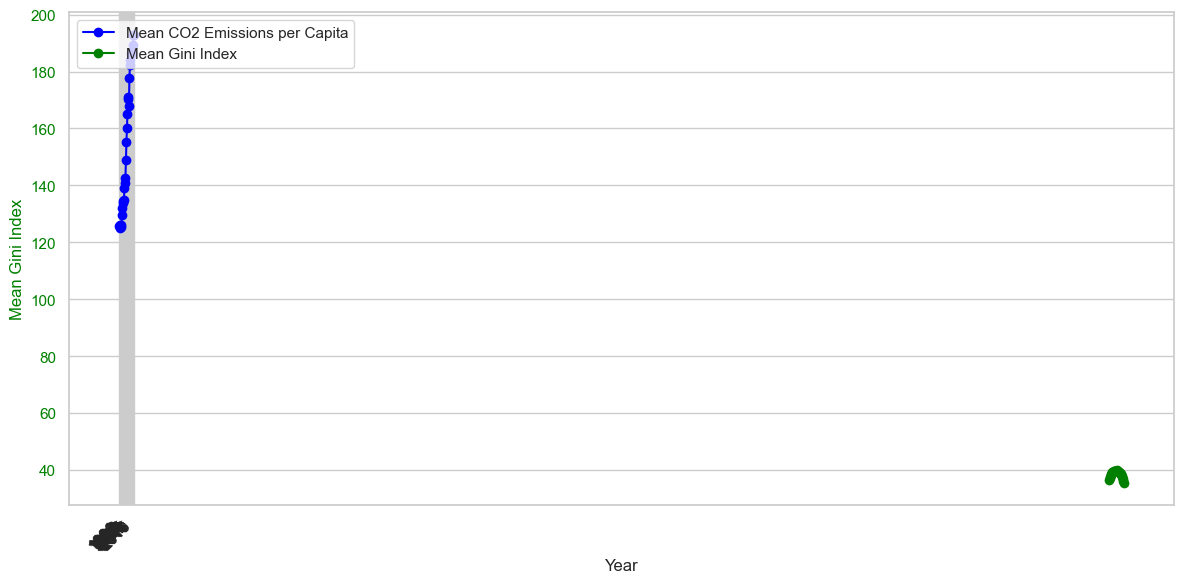

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


mean_co2 = data.mean()
mean_gini = Gini.mean() 
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(mean_co2.index, mean_co2.values, marker='o', color='blue', label='Mean CO2 Emissions per Capita', linestyle='-')
ax.set_xlabel('Year')
ax.set_ylabel('Mean CO2 Emissions per Capita', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

ax.plot(mean_gini.index, mean_gini.values, marker='o', color='green', label='Mean Gini Index', linestyle='-')
ax.set_ylabel('Mean Gini Index', color='green')
ax.tick_params(axis='y', labelcolor='green')

ax.legend(loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [108]:
import pandas as pd


mean_co2 = data.loc[:, '1990':'2019'].mean(axis=0)
mean_gini = Gini.loc[:, '1990':'2019'].mean(axis=0)  

df_co2 = pd.DataFrame({'Year': mean_co2.index, 'Mean_CO2': mean_co2.values})
df_gini = pd.DataFrame({'Year': mean_gini.index, 'Mean_Gini': mean_gini.values})
combined = pd.concat([df_co2, df_gini], axis=1)

print(combined)


    Year    Mean_CO2  Year  Mean_Gini
0   1990  125.731924  1990  36.546364
1   1991  126.135183  1991  37.082883
2   1992  125.100487  1992  37.615966
3   1993  125.230926  1993  38.363200
4   1994  126.223876  1994  38.756154
5   1995  129.593510  1995  39.100000
6   1996  132.134264  1996  39.307746
7   1997  133.912133  1997  39.293103
8   1998  134.495706  1998  39.444218
9   1999  134.984412  1999  39.499333
10  2000  139.040929  2000  39.615686
11  2001  140.868217  2001  39.672785
12  2002  142.538508  2002  39.683030
13  2003  149.023840  2003  39.619643
14  2004  155.099666  2004  39.767456
15  2005  160.008018  2005  39.833143
16  2006  164.982993  2006  39.782778
17  2007  170.486656  2007  39.672678
18  2008  170.937705  2008  39.462431
19  2009  167.822143  2009  39.333333
20  2010  177.625650  2010  39.138857
21  2011  182.187408  2011  38.995882
22  2012  184.170678  2012  38.931953
23  2013  186.079608  2013  38.720732
24  2014  186.389183  2014  38.522785
25  2015  18

In [109]:
import pandas as pd


mean_co2 = data.loc[:, '1990':'2019'].mean(axis=0)
mean_gini = Gini.loc[:, '1990':'2019'].mean(axis=0) 
df_co2 = pd.DataFrame({'Year': mean_co2.index, 'Mean_CO2': mean_co2.values})
df_gini = pd.DataFrame({'Year': mean_gini.index, 'Mean_Gini': mean_gini.values})

# Concatenate dataframes along the columns axis based on the common "Year" column
combined = pd.concat([df_co2, df_gini], axis=1)

# Remove one of the duplicated "Year" columns
combined = combined.loc[:, ~combined.columns.duplicated()]

# Display the combined dataframe
print(combined)


    Year    Mean_CO2  Mean_Gini
0   1990  125.731924  36.546364
1   1991  126.135183  37.082883
2   1992  125.100487  37.615966
3   1993  125.230926  38.363200
4   1994  126.223876  38.756154
5   1995  129.593510  39.100000
6   1996  132.134264  39.307746
7   1997  133.912133  39.293103
8   1998  134.495706  39.444218
9   1999  134.984412  39.499333
10  2000  139.040929  39.615686
11  2001  140.868217  39.672785
12  2002  142.538508  39.683030
13  2003  149.023840  39.619643
14  2004  155.099666  39.767456
15  2005  160.008018  39.833143
16  2006  164.982993  39.782778
17  2007  170.486656  39.672678
18  2008  170.937705  39.462431
19  2009  167.822143  39.333333
20  2010  177.625650  39.138857
21  2011  182.187408  38.995882
22  2012  184.170678  38.931953
23  2013  186.079608  38.720732
24  2014  186.389183  38.522785
25  2015  186.006192  38.062069
26  2016  186.366133  37.651449
27  2017  189.292636  36.862992
28  2018  192.980566  36.260909
29  2019  192.811322  35.476923


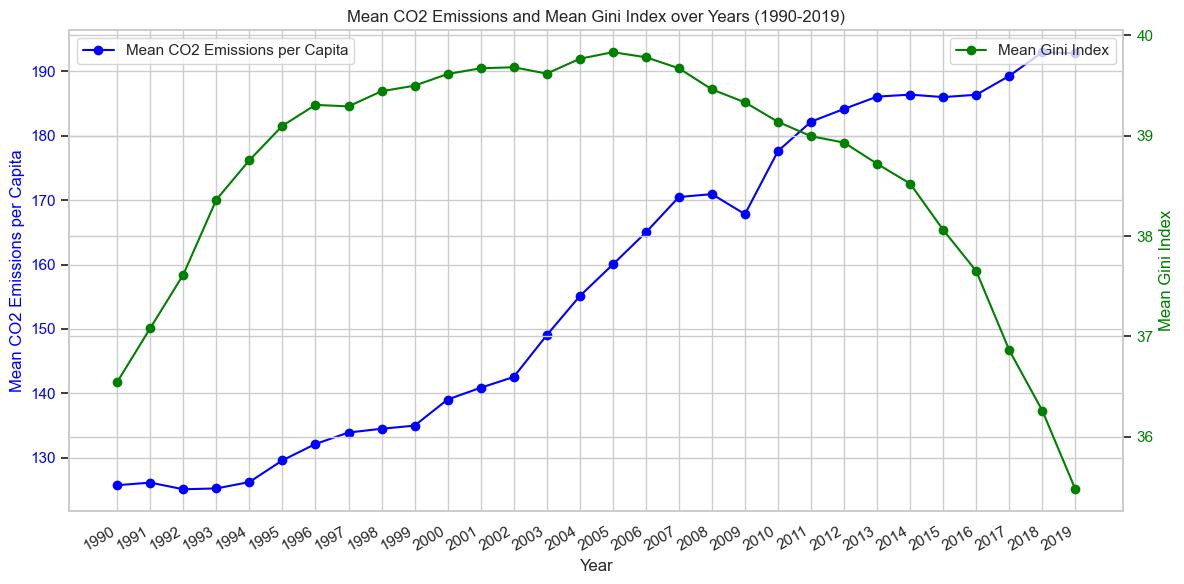

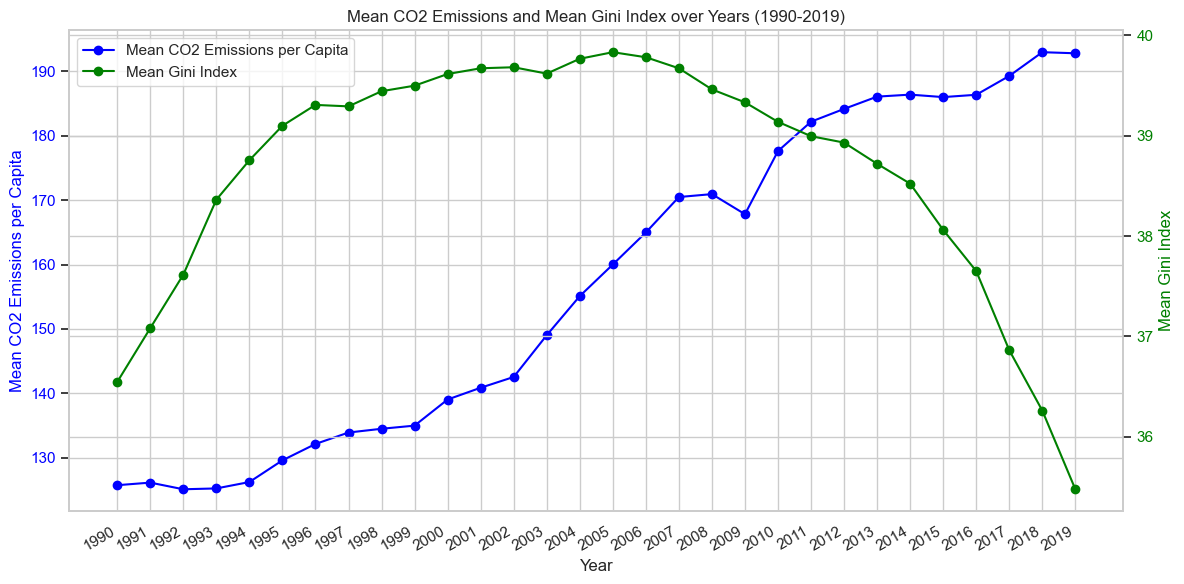

In [116]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))


line1, = ax1.plot(combined['Year'], combined['Mean_CO2'], color='blue', marker='o', label='Mean CO2 Emissions per Capita')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean CO2 Emissions per Capita', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()


line2, = ax2.plot(combined['Year'], combined['Mean_Gini'], color='green', marker='o', label='Mean Gini Index')
ax2.set_ylabel('Mean Gini Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Show the plot with automatically formatted and rotated x-axis labels
plt.gcf().autofmt_xdate()
plt.title('Mean CO2 Emissions and Mean Gini Index over Years (1990-2019)')
plt.tight_layout()
plt.show()


In [117]:
Gini.head(100)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.5,31.6,31.7,31.7,31.7,31.7,31.7,31.7,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,36.4,36.5,36.6,36.8,...,37.6,37.6,37.6,37.7,37.7,37.7,37.5,37.3,37.0,36.9
Algeria,37.2,37.1,37.0,36.8,36.7,36.6,36.4,36.3,36.2,36.0,...,34.5,34.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.1,49.2,49.2,49.3,49.4,49.4,49.5,49.6,49.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laos,NaN,NaN,34.4,34.5,34.6,34.7,34.8,34.9,35.0,35.0,...,36.1,36.2,36.3,36.4,36.5,36.5,36.6,36.7,36.7,NaN
Latvia,26.0,26.4,26.8,27.3,28.2,29.1,30.0,30.8,31.5,32.1,...,35.6,35.5,35.3,35.2,35.0,34.8,34.7,34.7,34.7,34.6
Lebanon,NaN,NaN,NaN,NaN,NaN,38.2,38.1,38.0,37.9,37.8,...,36.4,36.2,36.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
